# Layout

+ Searching text for keywords
+ Distribution of terms
+ Correlation

+ From last year:
    + Word frequencies
    + Conditional frequencies
    + Statistically significant collocations
    + Distinguishing or Important words and phrases (Wordls!)
        + tfidf
    + POS-tagged words and phrases
    + Lemmatized words and phrases
        + stemmers
    + Dictionary-based annotations.

+ divergences
    + kale

+ Sources
    + US senate press releases
        + e.g. [http://www.reid.senate.gov/press_releases](http://www.reid.senate.gov/press_releases)
    + Tumblr
    + Literature

# Week 2 - Corpus Linguistics

Intro stuff

For this notebook we will be using the following packages

In [106]:
import requests
import nltk
import pandas
import matplotlib.pyplot as plt
%matplotlib inline  

import json
import urllib.parse #For joining urls

# Getting our corpuses

To get started we will need some targets, lets start by downloading one of the corpuses from `nltk`. Lets take a look at how that works.

first we can get a list of corpuses avaible from the Gutenburg corpus

In [107]:
print(nltk.corpus.gutenberg.fileids())
print(len(nltk.corpus.gutenberg.fileids()))

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
18


We can also look at the individual works

In [108]:
nltk.corpus.gutenberg.raw('shakespeare-macbeth.txt')[:1000]

"[The Tragedie of Macbeth by William Shakespeare 1603]\n\n\nActus Primus. Scoena Prima.\n\nThunder and Lightning. Enter three Witches.\n\n  1. When shall we three meet againe?\nIn Thunder, Lightning, or in Raine?\n  2. When the Hurley-burley's done,\nWhen the Battaile's lost, and wonne\n\n   3. That will be ere the set of Sunne\n\n   1. Where the place?\n  2. Vpon the Heath\n\n   3. There to meet with Macbeth\n\n   1. I come, Gray-Malkin\n\n   All. Padock calls anon: faire is foule, and foule is faire,\nHouer through the fogge and filthie ayre.\n\nExeunt.\n\n\nScena Secunda.\n\nAlarum within. Enter King Malcome, Donalbaine, Lenox, with\nattendants,\nmeeting a bleeding Captaine.\n\n  King. What bloody man is that? he can report,\nAs seemeth by his plight, of the Reuolt\nThe newest state\n\n   Mal. This is the Serieant,\nWho like a good and hardie Souldier fought\n'Gainst my Captiuitie: Haile braue friend;\nSay to the King, the knowledge of the Broyle,\nAs thou didst leaue it\n\n   Cap. 

All the listed works have been nicely marked up and classified for us so we can do much better than just looking at raw text.

In [109]:
print(nltk.corpus.gutenberg.words('shakespeare-macbeth.txt'))
print(nltk.corpus.gutenberg.sents('shakespeare-macbeth.txt'))

['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', ...]
[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]


If we want to do some analysis we can start by simply counting the number of times each word occurs.

In [110]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

countedWords = wordCounter(nltk.corpus.gutenberg.words('shakespeare-macbeth.txt'))
countedWords[:10]

,count,word
0,1,beaten
1,1,greefe
2,2,norway
3,2,deliuer
4,161,it
5,1,probation
6,52,hath
7,1,throbs
8,1,faculties
9,1,westerne


Notice how `wordCounter()` is not a very complicated function. That is because the hard parts have already been done by `nltk`. If we were using unprocessed text we would have to tokenize and determine what to do with the non-word characters.

Lets plot our counts and see what it looks like.

First we need to sort the words by count.

In [111]:
#Doing this in place as we don't need the unsorted DataFrame
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:10]

,count,word
1185,1962,","
721,1235,.
3170,650,the
935,637,'
535,546,and
2174,477,:
189,384,to
2917,348,i
64,338,of
2539,241,?


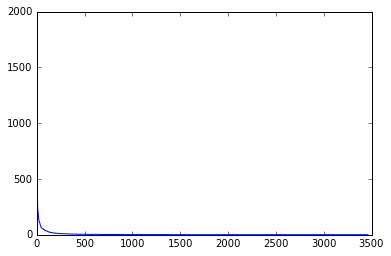

In [112]:
plt.plot(range(len(countedWords)), countedWords['count'])
plt.show()

This shows the likelihood of a word occurring is inversely proportional to its rank, this effect is called [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law).

What does the distribution of word lengths look like?

There are many other properties of words we can look at. First lets look at concordance.

To do this we need to load the text into a `ConcordanceIndex`

In [113]:
macbethIndex = nltk.text.ConcordanceIndex(nltk.corpus.gutenberg.words('shakespeare-macbeth.txt'))

Then we can get all the words that cooccur with a word, lets look at `'macbeth'`.

In [114]:
macbethIndex.print_concordance('macbeth')

No matches


weird, `'macbeth'` doesn't occur anywhere in the the text. What happened?

`ConcordanceIndex` is case sensitive, lets try looking for `'Macbeth'`

In [115]:
macbethIndex.print_concordance('Macbeth')

Displaying 25 of 61 matches:
                                  Macbeth by William Shakespeare 1603 ] Act
 the Heath 3 . There to meet with Macbeth 1 . I come , Gray - Malkin All . 
but all ' s too weake : For braue Macbeth ( well hee deserues that Name ) D
smay ' d not this our Captaines , Macbeth and Banquoh ? Cap . Yes , as Spar
, And with his former Title greet Macbeth Rosse . Ile see it done King . Wh
 King . What he hath lost , Noble Macbeth hath wonne . Exeunt . Scena Terti
ithin . 3 . A Drumme , a Drumme : Macbeth doth come All . The weyward Siste
, the Charme ' s wound vp . Enter Macbeth and Banquo . Macb . So foule and 
an : what are you ? 1 . All haile Macbeth , haile to thee Thane of Glamis 2
hee Thane of Glamis 2 . All haile Macbeth , haile to thee Thane of Cawdor 3
hee Thane of Cawdor 3 . All haile Macbeth , that shalt be King hereafter Ba
. Hayle 3 . Hayle 1 . Lesser than Macbeth , and greater 2 . Not so happy , 
hough thou be none : So all haile Macbeth , and Banquo 1 . 

That's a lot better

what about something a lot less frequent

In [116]:
print(countedWords[countedWords['word'] == 'Donalbaine'])
macbethIndex.print_concordance('Donalbaine')

Empty DataFrame
Columns: [count, word]
Index: []
Displaying 7 of 7 matches:
m within . Enter King Malcome , Donalbaine , Lenox , with attendants , mee
Enter King , Lenox , Malcolme , Donalbaine , and Attendants . King . Is ex
rches . Enter King , Malcolme , Donalbaine , Banquo , Lenox , Macduff , Ro
 ' th ' second Chamber ? Lady . Donalbaine Mac . This is a sorry sight Lad
er , and Treason , Banquo , and Donalbaine : Malcolme awake , Shake off th
to brag of . Enter Malcolme and Donalbaine . Donal . What is amisse ? Macb
were subborned , Malcolme , and Donalbaine the Kings two Sonnes Are stolne


# Getting press releases

First we need to understand the GitHub API

requests are made to `'https://api.github.com/'` and responses are in JSON, similar to Tumblr's API.

We will get the information on [github.com/lintool/GrimmerSenatePressReleases](https://github.com/lintool/GrimmerSenatePressReleases) as it contains a nice set documents.

In [117]:
r = requests.get('https://api.github.com/repos/lintool/GrimmerSenatePressReleases')
senateReleasesData = json.loads(r.text)
print(senateReleasesData.keys())
print(senateReleasesData['description'])

dict_keys(['collaborators_url', 'open_issues_count', 'open_issues', 'labels_url', 'stargazers_count', 'ssh_url', 'deployments_url', 'events_url', 'svn_url', 'git_refs_url', 'private', 'issues_url', 'subscribers_count', 'comments_url', 'contributors_url', 'issue_events_url', 'commits_url', 'keys_url', 'network_count', 'name', 'mirror_url', 'updated_at', 'notifications_url', 'forks', 'teams_url', 'created_at', 'compare_url', 'merges_url', 'archive_url', 'pushed_at', 'language', 'description', 'forks_url', 'contents_url', 'git_tags_url', 'branches_url', 'forks_count', 'trees_url', 'owner', 'subscription_url', 'downloads_url', 'issue_comment_url', 'has_issues', 'has_downloads', 'blobs_url', 'default_branch', 'clone_url', 'milestones_url', 'id', 'stargazers_url', 'homepage', 'fork', 'watchers', 'assignees_url', 'url', 'subscribers_url', 'releases_url', 'languages_url', 'git_url', 'git_commits_url', 'html_url', 'hooks_url', 'tags_url', 'statuses_url', 'has_pages', 'has_wiki', 'watchers_count

What we are interested in is the `'contents_url'`

In [118]:
print(senateReleasesData['contents_url'])

https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/{+path}


We can use this to get any, or all of the files from the repo

In [122]:
r= requests.get('https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse')
whitehouseLinks = json.loads(r.text)
whitehouseLinks

[{'_links': {'git': 'https://api.github.com/repos/lintool/GrimmerSenatePressReleases/git/blobs/f524289ee563dca58690c8d36c23dce5dbd9962a',
   'html': 'https://github.com/lintool/GrimmerSenatePressReleases/blob/master/raw/Whitehouse/10Apr2007Whitehouse123.txt',
   'self': 'https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse/10Apr2007Whitehouse123.txt?ref=master'},
  'download_url': 'https://raw.githubusercontent.com/lintool/GrimmerSenatePressReleases/master/raw/Whitehouse/10Apr2007Whitehouse123.txt',
  'git_url': 'https://api.github.com/repos/lintool/GrimmerSenatePressReleases/git/blobs/f524289ee563dca58690c8d36c23dce5dbd9962a',
  'html_url': 'https://github.com/lintool/GrimmerSenatePressReleases/blob/master/raw/Whitehouse/10Apr2007Whitehouse123.txt',
  'name': '10Apr2007Whitehouse123.txt',
  'path': 'raw/Whitehouse/10Apr2007Whitehouse123.txt',
  'sha': 'f524289ee563dca58690c8d36c23dce5dbd9962a',
  'size': 2206,
  'type': 'file',
  'url': 'https://api.

Now we have a list of information about Whitehouse press releases. Lets look at one of them.

In [126]:
r = requests.get(whitehouseLinks[0]['download_url'])
whitehouseRelease = r.text
print(whitehouseRelease[:1000])
len(whitehouseRelease)

SEN. WHITEHOUSE SHARES WESTERLY GIRL'S STORY IN PUSH FOR STEM CELL RESEARCH
  Sharing the story of Lila Barber, a 12 year old girl from Westerly, Sen. Sheldon Whitehouse (D-R.I.) on Tuesday, April 10, 2007, illustrated the hope stem cell research can offer in a speech on the Senate floor in favor of legislation to expand federal funding for stem cell research.  
   Whitehouse met Lila two weeks ago. She was diagnosed two years ago with osteosarcoma, a cancerous bone condition, and last year underwent cadaver bone transplant surgery. The procedure saved her leg and is helping her remain cancer-free, but the transplanted tissue will not grow with her and likely will break down over time. Stem cell research, Whitehouse explained, could vastly improve the care of patients like Lila by allowing surgeons to enhance transplants with a patient's own stem cells, which could replace the lost bone and cartilage, or grow entirely new replacement bones and joints. 
   "Stem cell research gives hope

2206

In [128]:
nltk.tokenize.simple(whitehouseRelease)

TypeError: 'module' object is not callable

In [143]:
WhText = nltk.Text(nltk.word_tokenize(whitehouseRelease))
WhText.similar('story')

department efforts number care


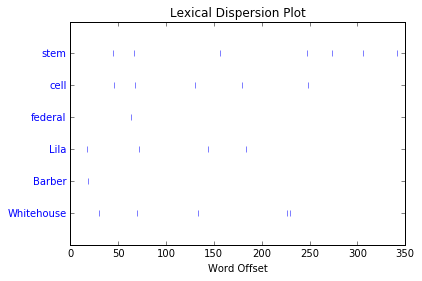